In [1]:
import numpy as np
import matplotlib.pyplot as plt
Lx = 20; Ly = 10
dx = 1.5; dy = dx
Lx = 10; Ly = 10
dx = 1; dy = dx
x = np.arange(0,Lx+dx,dx)
y = np.arange(0,Ly+dy,dy)

T = np.zeros([np.size(y),np.size(x)])
Tviejo = np.zeros([np.size(y),np.size(x)])

# Condiciones de frontera de Dirichlet\n",
T[0] = 50
T[-1] = 100
for j in np.arange(0,np.size(y)):
    T[j][0]= 25
    T[j][-1] = 75

In [2]:
    error = 1
    while error>0.01:
        Tviejo[:][:] = T[:][:]
        for j in np.arange(1,np.size(y)-1):
            for i in np.arange(1,np.size(x)-1):
                T[j][i] = (T[j][i+1]+T[j][i-1]+T[j+1][i]+T[j-1][i])/4
        T
        E = np.abs((T - Tviejo)/T)
        error = E.max()

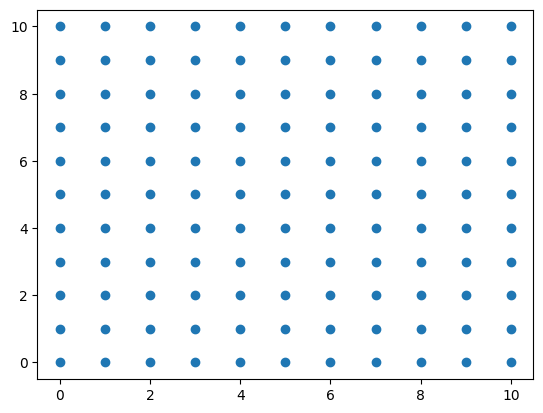

In [3]:
# Graficas
X, Y = np.meshgrid(x,y)
plt.scatter(X,Y)

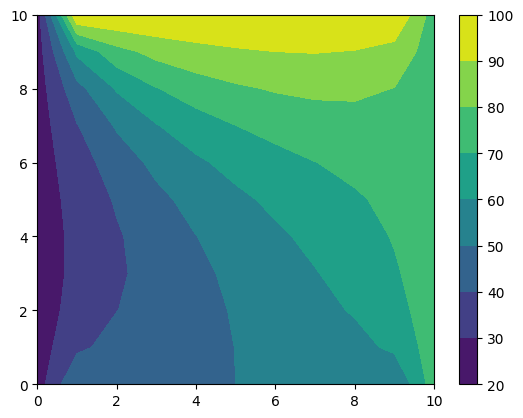

In [4]:
plt.contourf(X,Y,T)
plt.colorbar()


In [5]:
 dTdx = np.zeros([y.size,x.size])
 dTdy = np.zeros([y.size,x.size])
 
 for i in np.arange(0,x.size):
     if i == 0:
        dTdx[:,i] = (T[:,i+1]-T[:,i])/dx
     elif i == x.size-1:
         dTdx[:,i] = (T[:,i]-T[:,i-1])/dx
     else:
         dTdx[:,i] = (T[:,i+1]-T[:,i-1])/2/dx
 
 for j in np.arange(0,y.size):
     if j == 0:
         dTdy[j,:] = (T[j+1,:]-T[j,:])/dy
     elif j == y.size-1:
         dTdy[j,:] = (T[j,:]-T[j-1,:])/dy
     else:
         dTdy[j,:] = (T[j+1,:]-T[j-1,:])/2/dy

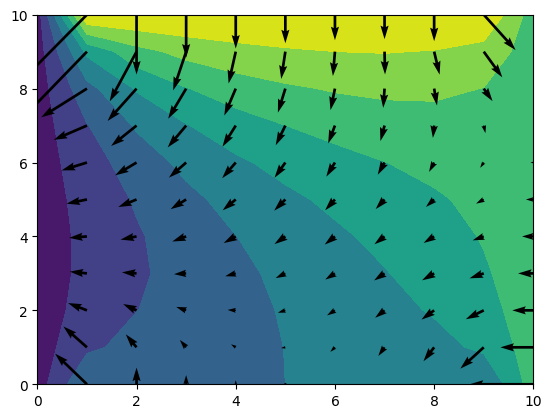

In [6]:
kp = 0.5
qx = -kp*dTdx
qy = -kp*dTdy
plt.contourf(X,Y,T)
plt.quiver(x,y,qx,qy)